In [25]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd

data = pd.read_csv(
    "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset.csv"
)

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
X = data[["GrLivArea"]]
X.head()

,GrLivArea
0,1710
1,1262
2,1786
3,1717
4,2198


In [12]:
y = data.SalePrice
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

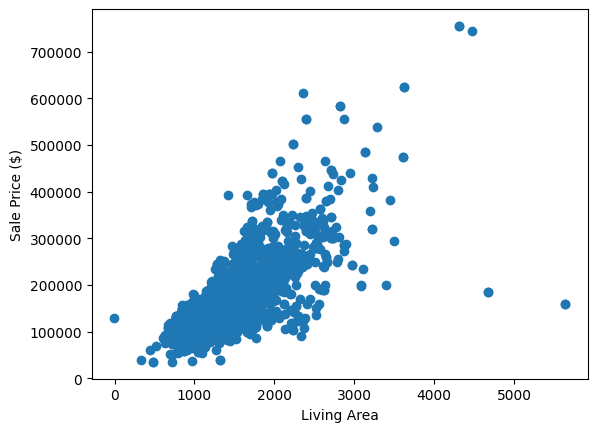

In [28]:
plt.scatter(X, y)
plt.xlabel("Living Area")
plt.ylabel("Sale Price ($)");

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(
    X, y
)  # Fit updates the `coef_` and `intercept_` instance variables inside the model instance

LinearRegression()

In [21]:
model.coef_

array([105.00927564])

In [22]:
model.intercept_

22104.12101002084

In [24]:
model.score(X, y)  # R_squared

0.48960426399689116

In [32]:
y_pred = model.predict(X)
y_pred

array([201669.98234688, 154625.82686213, 209650.68729518, ...,
       194319.33305239, 256169.79640175,  92670.35423714])

## The Holdout Method

In [63]:
from sklearn.model_selection import train_test_split

# data_train, data_test = train_test_split(data, test_size=0.3)
# data_test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1389
)
X_train

holdout_model = LinearRegression()

holdout_model.fit(X_train, y_train)

holdout_model.score(X_test, y_test)

0.4811359861993183

## K-Fold Cross Validation

In [73]:
from sklearn.model_selection import cross_validate

cv_model = LinearRegression()

cv_results = cross_validate(cv_model, X, y, cv=5)
cv_results

{'fit_time': array([0.00342417, 0.00261283, 0.00286508, 0.00200295, 0.00112414]),
 'score_time': array([0.00228667, 0.00145316, 0.00205112, 0.0012629 , 0.00070405]),
 'test_score': array([0.55810657, 0.52593307, 0.50430916, 0.3911751 , 0.45203221])}

In [71]:
cv_results["test_score"].mean()

0.4813651294096083

## Learning Curves

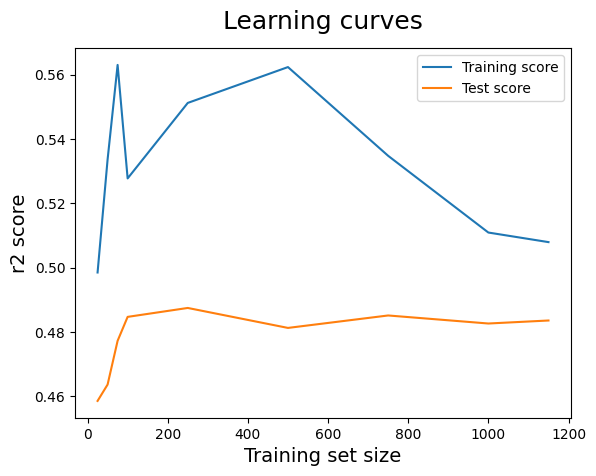

In [77]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]
# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [ ]:
# 